# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [2]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

C:\Users\Relu\AppData\Local\Temp\ipykernel_20056\3936888326.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face(gray=True)


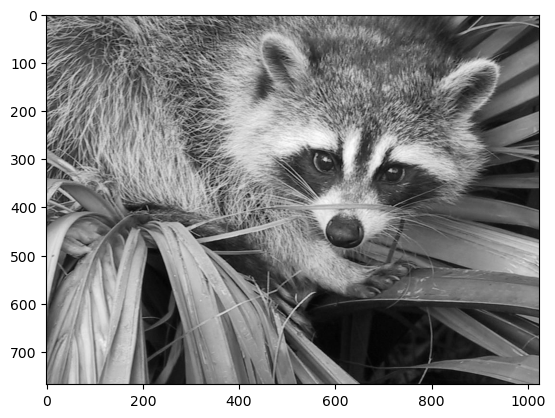

In [3]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

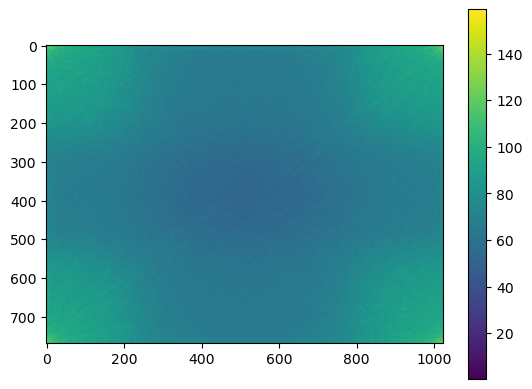

In [4]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

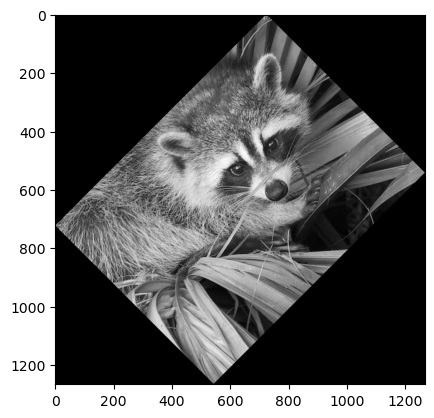

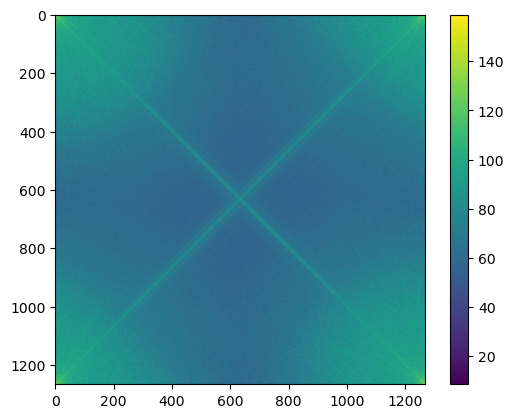

In [5]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

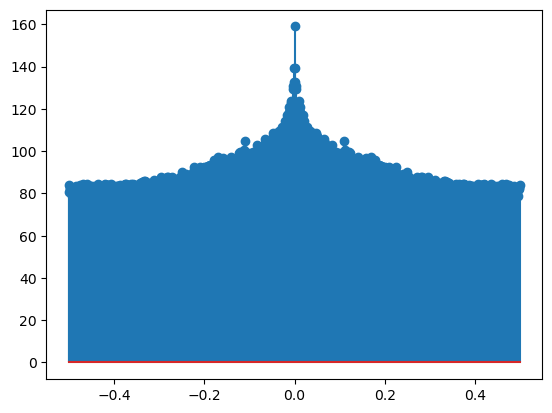

In [6]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

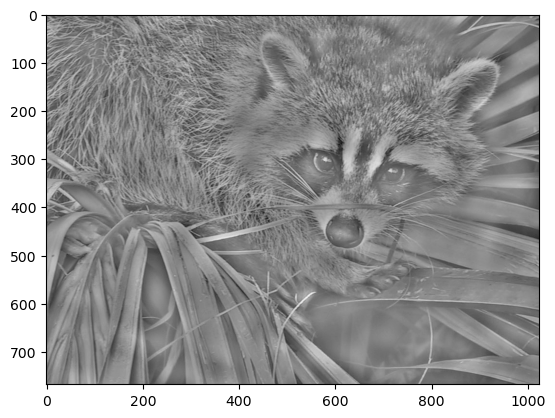

In [7]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

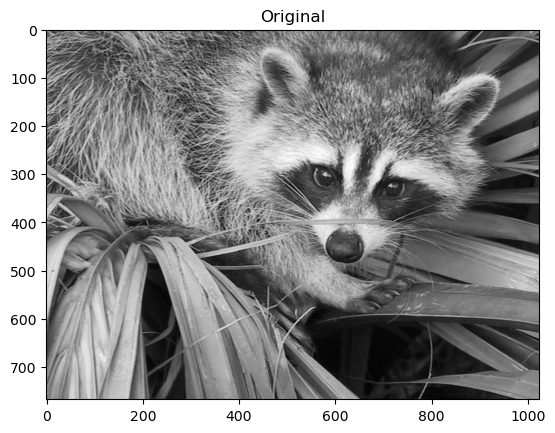

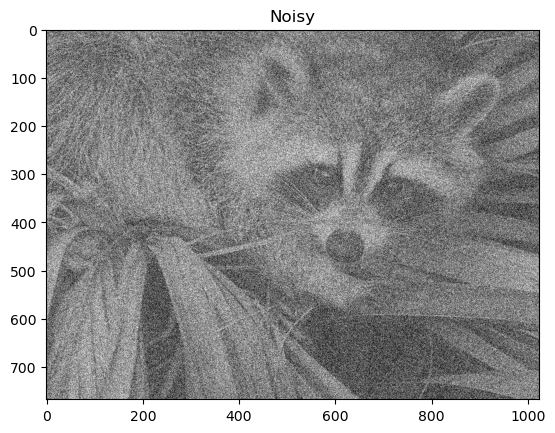

In [8]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. [8p] Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. [4p] Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. [4p] Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

4. [4p] Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la [laboratorul 5](https://cs.unibuc.ro/~pirofti/ps/ps-lab-5.pdf).

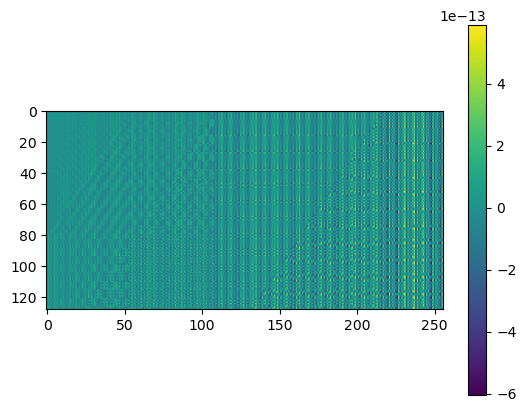

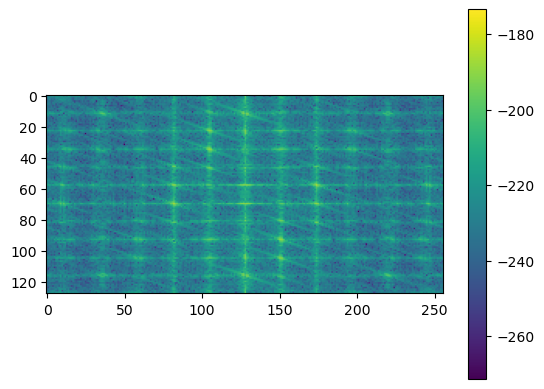

In [23]:
# 1)

# x_n1_n2 = sin(2 * pi * n1 + 3 * pi * n2) where x_n1_n2 is a matrix of size n1 * n2
n1 = 128
n2 = 256
x_n1_n2 = np.zeros((n1, n2))
for i in range(n1):
    for j in range(n2):
        x_n1_n2[i][j] = np.sin(2 * np.pi * i + 3 * np.pi * j)
plt.imshow(x_n1_n2)
plt.colorbar()
plt.show()

# spectrul
y_n1_n2 = np.fft.fft2(x_n1_n2)
plt.imshow(20*np.log10(abs(y_n1_n2)))
plt.colorbar()
plt.show()

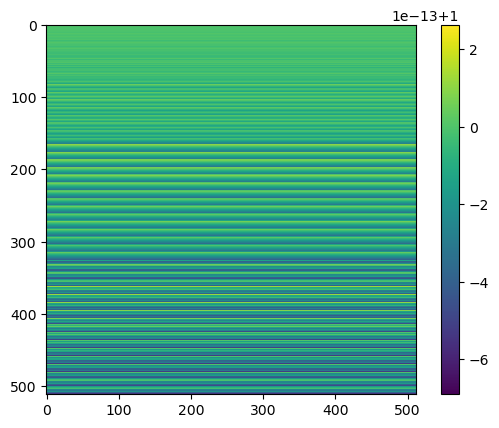

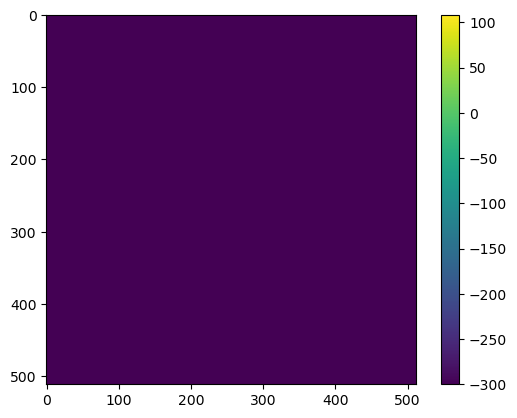

In [10]:
# x_n1_n2 = sin(4 * pi * n1) + cos(6 * pi * n2) where x_n1_n2 is a matrix of size n1 * n2
n1 = 512
n2 = 512
x_n1_n2 = np.zeros((n1, n2))
for i in range(n1):
    for j in range(n2):
        x_n1_n2[i][j] = np.sin(4 * np.pi * i) + np.cos(6 * np.pi * j)
plt.imshow(x_n1_n2)
plt.colorbar()
plt.show()

# spectrul
y_n1_n2 = np.fft.fft2(x_n1_n2)
plt.imshow(20*np.log10(abs(y_n1_n2) + 1e-15))
plt.colorbar()
plt.show()

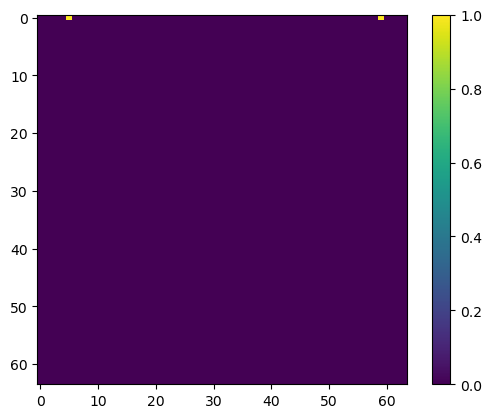

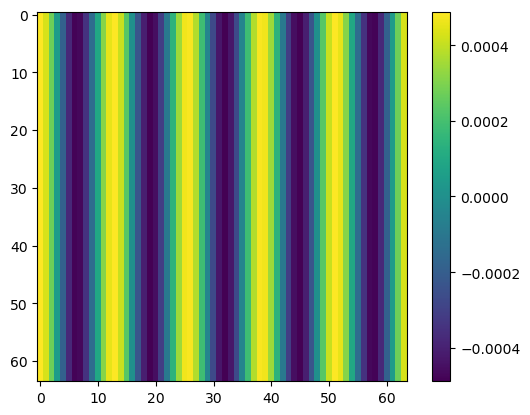

In [19]:
# Y_0_5 = Y_0_N-5 = 1, atlfel Y_m1_m2 = 0 oricare ar fi m1, m2
# Y reprezinta informatie in domeniul frecventei
N = 64
Y = np.zeros((N, N))
Y[0][5] = 1
Y[0][N-5] = 1
plt.imshow(Y)
plt.colorbar()
plt.show()

# afisarea imaginii
X = np.fft.ifft2(Y)
plt.imshow(np.real(X))
plt.colorbar()
plt.show()


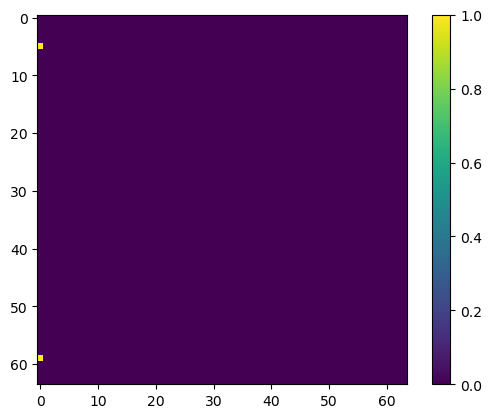

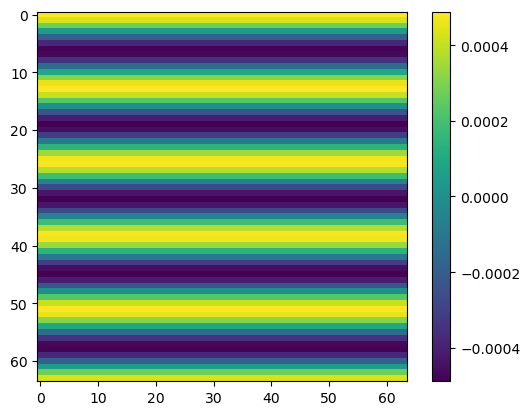

In [20]:
# Y_5_0 = Y_N-5_0 = 1, atlfel Y_m1_m2 = 0 oricare ar fi m1, m2
# Y reprezinta informatie in domeniul frecventei
N = 64
Y = np.zeros((N, N))
Y[5][0] = 1
Y[N-5][0] = 1
plt.imshow(Y)
plt.colorbar()
plt.show()

# afisarea imaginii
X = np.fft.ifft2(Y)
plt.imshow(np.real(X))
plt.colorbar()
plt.show()

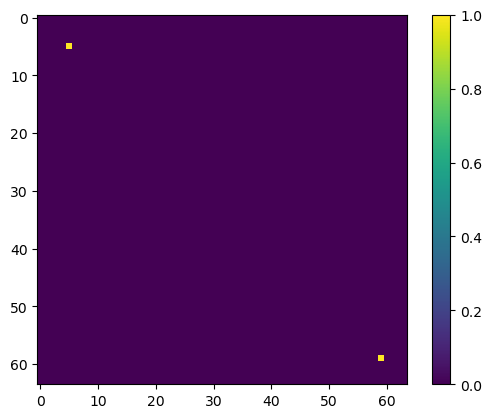

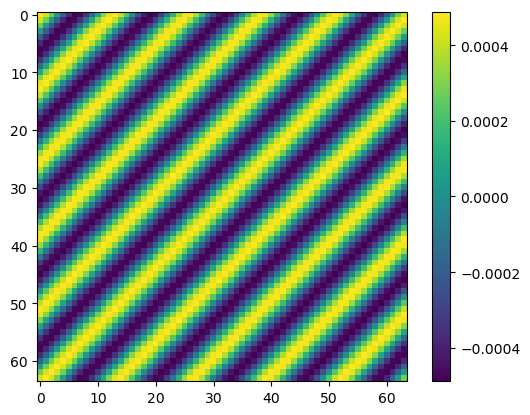

In [21]:
# Y_5_5 = Y_N-5_N-5 = 1, atlfel Y_m1_m2 = 0 oricare ar fi m1, m2
# Y reprezinta informatie in domeniul frecventei
N = 64
Y = np.zeros((N, N))
Y[5][5] = 1
Y[N-5][N-5] = 1
plt.imshow(Y)
plt.colorbar()
plt.show()

# afisarea imaginii
X = np.fft.ifft2(Y)
plt.imshow(np.real(X))
plt.colorbar()
plt.show()

C:\Users\Relu\AppData\Local\Temp\ipykernel_20056\1920318912.py:41: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  raton_img = misc.face(gray=True)


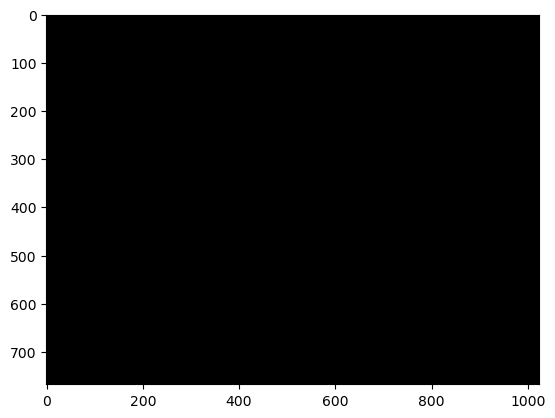

In [30]:
# Comprimati imaginea cu ratonul de mai sus prin atenuarea frecventelor inalte pana la un prag SNR autoimpus
raton_img = misc.face(gray=True)
Y_raton = np.fft.fft2(raton_img)
freq_db = 20*np.log10(abs(Y_raton))
SNR = 10
SNR_db = 20*np.log10(SNR)
# frequency_cutoff = ? must be found so that the SNR is the given one ?
# def find_frequency_cutoff(SNR, img):
